#### 5(d). Read a grayscale image and perform the image segmentation using Adaptive thresholding algorithm


#### Import the Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Loading the Original Image

shape of the original image: (651, 814)


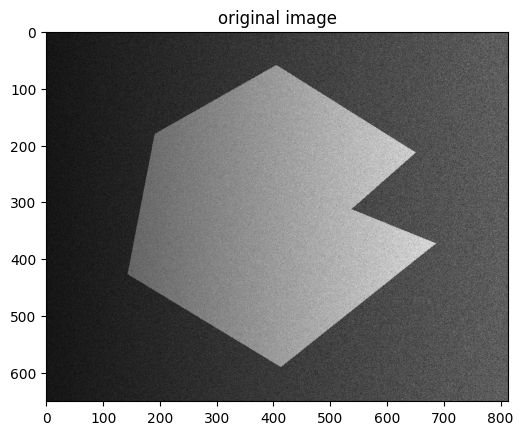

min pixel intensity: 6
max pixel intensity: 113


In [2]:
original_image = cv2.imread('./images/septagon.tif', 0)
print(f"shape of the original image: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title('original image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### Function for Adaptive Mean Thresholding

In [9]:
def zero_padding(image, pad):
    height, width = image.shape
    padded_image = np.zeros((height+2*pad, width+2*pad), dtype=np.uint8)
    padded_image[pad:pad+height, pad:pad+width] = image
    return padded_image

In [10]:
def adaptive_mean_thresholding(image, block_size = 11, C=2):
    pad = block_size // 2
    padded_image = zero_padding(image, pad)
    
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            local_window = padded_image[i:i+block_size, j:j+block_size]
            mean_val = np.mean(local_window)
            threshold = mean_val - C
            output[i,j] = 255 if image[i,j] > threshold else 0
    return output        

### Apply the Adaptive Mean Thresholding

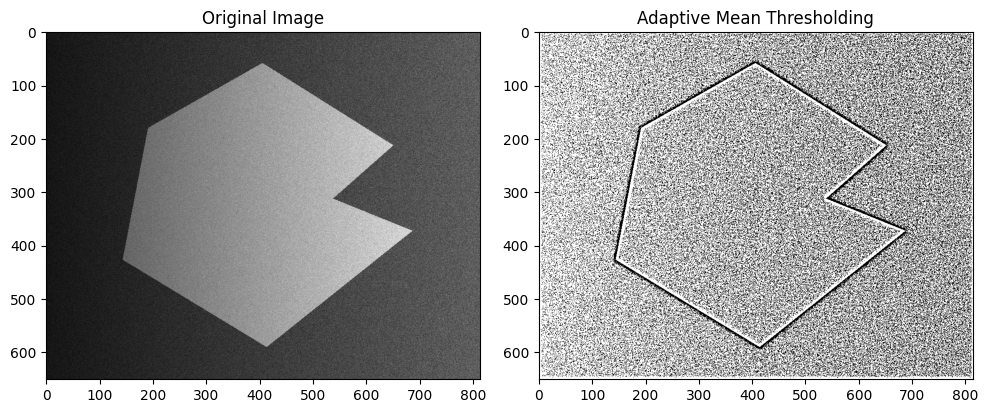

In [12]:
adaptive_mean_image = adaptive_mean_thresholding(original_image, block_size=11, C=2)

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(adaptive_mean_image, cmap='gray')
plt.title('Adaptive Mean Thresholding')

plt.tight_layout()
plt.show()

### Function for Adaptive Gaussian Thresholding

In [13]:
def zero_padding(image, pad):
    height, width = image.shape
    padded_image = np.zeros((height+2*pad, width+2*pad), dtype=np.uint8)
    padded_image[pad:pad+height, pad:pad+width] = image
    return padded_image

In [16]:
def adaptive_gaussian_thresholding(image, block_size=11, C=2, sigma=2):

    pad = block_size // 2
    padded_img = zero_padding(image, pad)

    # Create Gaussian kernel
    x = np.linspace(-pad, pad, block_size)
    y = np.linspace(-pad, pad, block_size)
    x, y = np.meshgrid(x, y)
    gaussian_kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gaussian_kernel /= np.sum(gaussian_kernel)

    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            local_window = padded_img[i:i+block_size, j:j+block_size]
            weighted_mean = np.sum(local_window * gaussian_kernel)
            threshold = weighted_mean - C
            output[i, j] = 255 if image[i, j] > threshold else 0

    return output

### Apply Adaptive Gaussian Thresholding

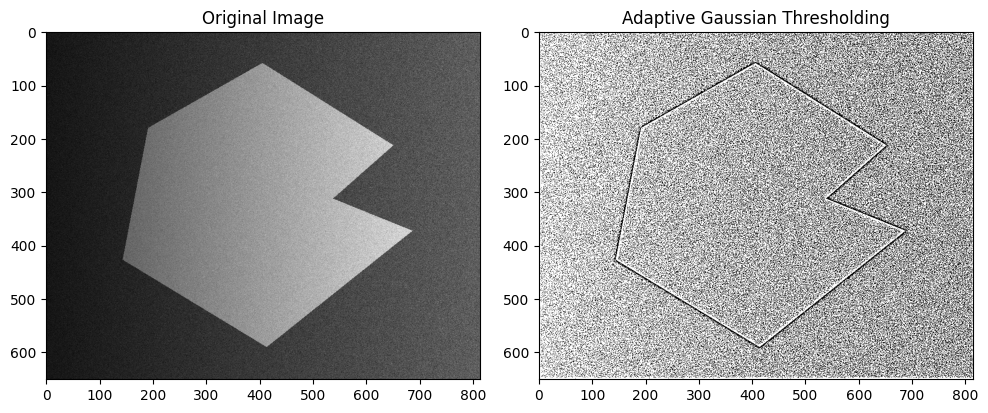

In [17]:
adaptive_gaussian_image = adaptive_gaussian_thresholding(original_image, block_size=11, C=2)

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(adaptive_gaussian_image, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')

plt.tight_layout()
plt.show()

### Plotting Original Image && Adaptive Mean && Adaptive Gaussian Thresholding Image

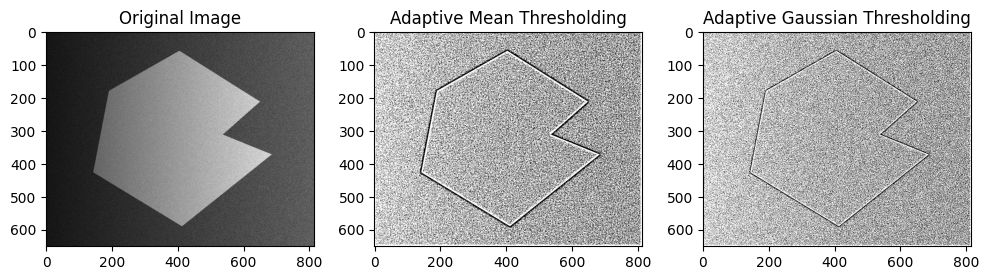

In [24]:
plt.figure(figsize=(10,12))
plt.subplot(1,3,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(adaptive_mean_image, cmap='gray')
plt.title('Adaptive Mean Thresholding')

plt.subplot(1,3,3)
plt.imshow(adaptive_gaussian_image, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')

plt.tight_layout()
plt.show()

### OpenCV Built-in Function

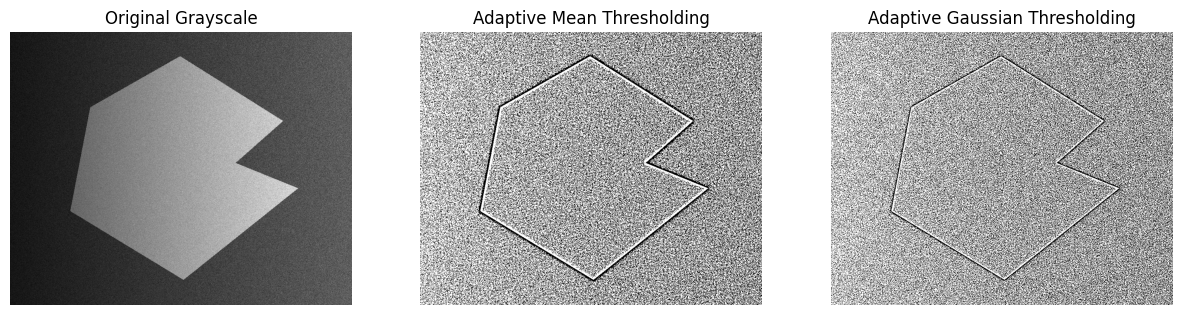

In [ ]:

# --- Apply Adaptive Mean Thresholding ---
adaptive_mean = cv2.adaptiveThreshold(
    original_image, 
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 
    blockSize=11,  # Size of the neighborhood (must be odd)
    C=2            # Constant subtracted from mean
)

# --- Apply Adaptive Gaussian Thresholding ---
adaptive_gaussian = cv2.adaptiveThreshold(
    original_image, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    blockSize=11, 
    C=2
)


# Original
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

# Adaptive Mean
plt.subplot(1,3,2)
plt.imshow(adaptive_mean, cmap='gray')
plt.title('Adaptive Mean Thresholding')
plt.axis('off')

# Adaptive Gaussian
plt.subplot(1,3,3)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')
plt.axis('off')

plt.show()